In [1]:
import sys
sys.path.append('../Codes/')
import numpy as np
import matplotlib.pyplot as plt
from Sequences import*
from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
%autosave 60

Autosaving every 60 seconds


In [7]:
def hamming_distance(chaine1, chaine2):
    return sum(c1 != c2 for c1, c2 in zip(chaine1, chaine2))

In [53]:
Master_Sequence = Sequence(seq_id = 0, parent = 'aaaaaaaaa', Master_Seq=True)
Sequences = np.array([Master_Sequence])
zero_date = datetime(2000, 1, 1)

file = open('../Text_files/file_parent_daughter.txt', 'w+')
file_1 = open('../Text_files/timedNodeFile.txt', 'w+')
file_2 = open('../Text_files/strainFile.txt', 'w+')
#np.savetxt(file_1, np.array(['Node', 'Parent', 'Time', 'SigClade']), fmt='%d')
#file.write("\n")
np.savetxt(file, np.array([str(Master_Sequence.id)+'\t', str(Master_Sequence.parent_id)]), fmt='%s', delimiter='', newline='', header = 'node\t parent\n', comments='')
file.write("\n")
np.savetxt(file_1, np.array([str(Master_Sequence.id)+'\t', str(Master_Sequence.parent_id)+'\t', str(0)+'\t' , str(0)]), fmt='%s', delimiter='', newline='', header = 'Node\t Parent\t Time\t SigClade\n', comments='')
file_1.write("\n")

n_seq = 10000
for i in range(1, n_seq):
    parent = np.random.choice(Sequences)
    parent.tree_position = 0
    new_seq = Sequence(seq_id = i, parent = parent.sequence, parent_id = parent.id)
    Sequences = np.append(Sequences, new_seq)
    #distance = hamming_distance(Master_Sequence.sequence, new_seq.sequence)
    new_date = zero_date + timedelta(new_seq.hamming_distance)
    np.savetxt(file, np.array([str(new_seq.id)+'\t', str(parent.parent_id)]), fmt='%s', delimiter='', newline='')
    file.write("\n")
    np.savetxt(file_1, np.array([str(new_seq.id)+'\t', str(parent.parent_id)+'\t', str(new_seq.hamming_distance)+'\t', str(0)]), fmt='%s', delimiter='', newline='')
    file_1.write("\n")
    
for i in range(1, n_seq):
    if(Sequences[i].tree_position==1):
        new_date = zero_date + timedelta(Sequences[i].hamming_distance)
        np.savetxt(file_2, np.array([str(Sequences[i].id)+'\t', 'A/Germany/'+str(i)+'/2020'+'\t', 'Germany'+'\t', 'EPI_ISL_'+str(i)+'\t', str(new_date.year)+'-'+str(new_date.month)+'-'+str(new_date.day)+'\t', '0']),fmt='%s', delimiter='', newline='')
        file_2.write("\n")
        
file.close()
file_1.close()
file_2.close()
print(Sequences[0].id, Sequences[0].parent_id, Sequences[0].sequence,Sequences[0].clone_size, Sequences[0].active, Sequences[0].energy, Sequences[0].tree_position)
print(Sequences[1].id, Sequences[1].parent_id, Sequences[1].sequence,Sequences[1].clone_size, Sequences[1].active, Sequences[1].energy, Sequences[1].tree_position)
print(Sequences[30].id, Sequences[30].parent_id, Sequences[30].sequence,Sequences[30].clone_size, Sequences[30].active, Sequences[30].energy, Sequences[30].tree_position)
print(Sequences[8000].id, Sequences[8000].parent_id, Sequences[8000].sequence,Sequences[8000].clone_size, Sequences[8000].active, Sequences[8000].energy, Sequences[8000].tree_position)
print_raw_file(Sequences, "../Text_files/file.txt")
generate_newick_format("../Text_files/file.txt")


0 0 aaaaaaaaa 1 False 0 0
1 0 aabaaaaaa 1 False 0 0
30 1 aabaadaaa 1 False 0 0
8000 2247 daadbcdaa 1 False 0 0
[[   0    0]
 [   0    1]
 [   1    2]
 ...
 [ 602 9997]
 [1253 9998]
 [2257 9999]]


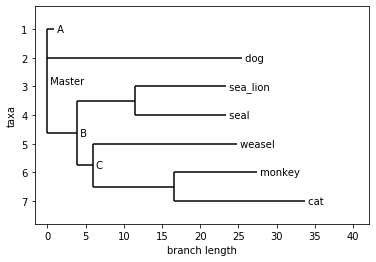

In [5]:
tree = Phylo.read(StringIO("Master(A():0.84600,B((sea_lion:11.99700, seal:12.00300):7.52973,C((monkey:10.85930,cat:17.14069):10.59201, weasel:18.87953):2.09460):3.87382,dog:25.46154)"), "newick")
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [33]:
distances = np.array([])
for i in range(n_seq):
    distances = np.append(distances,Sequences[i].hamming_distance)

In [51]:
data_distances = np.histogram(distances, bins=range(int(max(distances))))

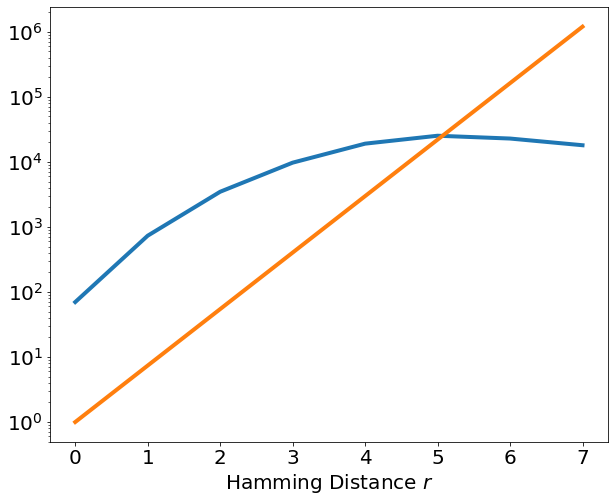

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(data_distances[1][0:-1], data_distances[0], linewidth = 4)
ax.plot(data_distances[1][0:-1], np.exp(2*data_distances[1][0:-1]), linewidth = 4)
ax.set_yscale('log')
#ax.set_ylim(1,1e10)
ax.set_xlabel(r'Hamming Distance $r$', fontsize = 20)
ax.set_ylabel(r'', fontsize = 20)
ax.tick_params(labelsize = 20)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(np.concatenate(([Line2D([0], [0], color='tab:red', linewidth=4, linestyle='solid', ms = 8)],handles)),np.concatenate(([r'$n_b(r, \rho)$'],labels)), loc = 0, fontsize = 20)



In [6]:
from datetime import datetime, timedelta
specific_date = datetime(2019, 11, 25)
new_date = specific_date + timedelta(21)
print (str(new_date.year))

2019
